# THE SPARKS FOUNDATION

TASK 5: EXPLORATORY DATA ANALYSIS-SPORTS

Objective: To perform exploratory data analysis on 'Indian Premier League' dataset.

Author: RHYTHM RASTOGI

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
deliveries = pd.read_csv(r'C:\\Users\\RHYTHM RASTOGI\\Desktop\\deliveries.csv') #Loading the deliveries dataset
deliveries.shape #Give dimensions of the dataset

(179078, 21)

In [4]:
deliveries.head() #to get first 5 rows

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [25]:
match = pd.read_csv(r'C:\\Users\\RHYTHM RASTOGI\\Desktop\\matches.csv') #Loading the matches dataset
match.shape

(756, 18)

In [6]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [8]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

In [9]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
season_data=match[['id','season','winner']]

complete_data=deliveries.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [11]:
match.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [12]:
#The variable 'umpire3' is dropped because it contains too many missing data.
match = match.drop(columns=["umpire3"],axis=1)

match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [13]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

player_dismissed,dismissal_kind,fielder have lot of missing values as dismissal of player does not happen in every ball or over.

In [14]:
wins_per_season = match.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

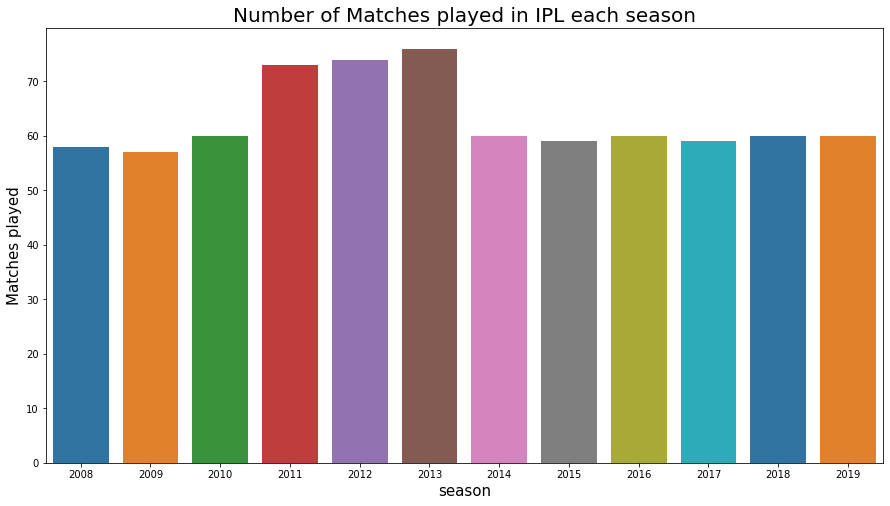

In [15]:
plt.figure(figsize = (15,8))
sn.countplot('season',data=match,palette="tab10")
plt.title("Number of Matches played in IPL each season",fontsize=20)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches played',fontsize=15)
plt.show()

Most number of matches were played in 1the year 2023,2012 and 2011.

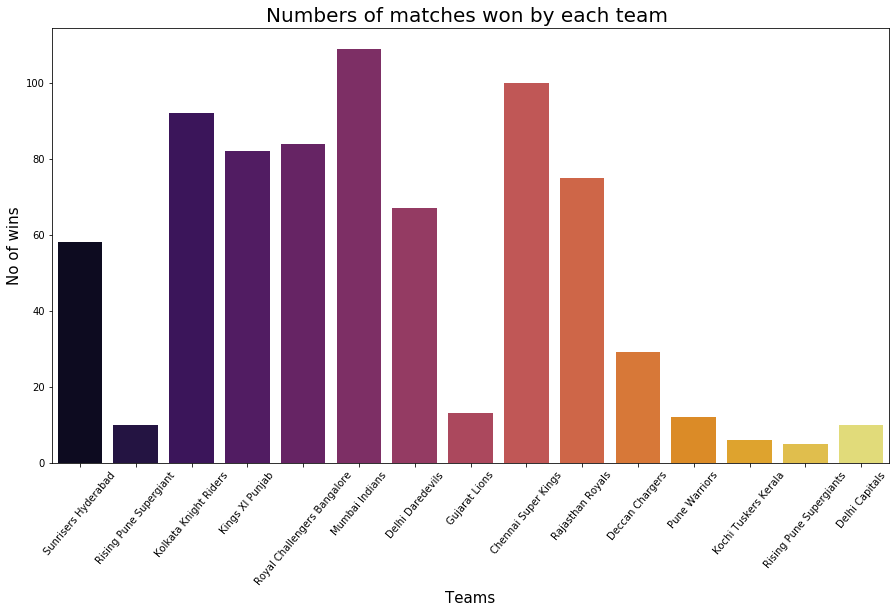

In [16]:
plt.figure(figsize = (15,8))
sn.countplot(x='winner',data=match, palette='inferno')
plt.title("Numbers of matches won by each team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

Most number of wins are seen by Mumbai Indians followed by Chennai Super Kings.

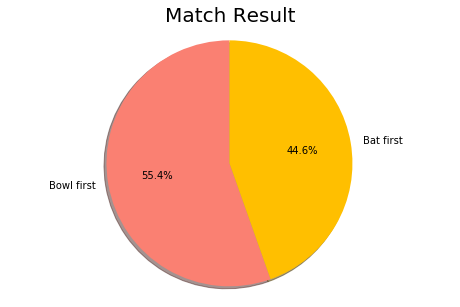

In [17]:
match['win_by']=np.where(match['win_by_runs']>0,'Bat first','Bowl first')
win = match.win_by.value_counts()
labels = np.array(win.index)
sizes = win.values
colors = ['#FA8072','#FFBF00']
plt.figure(figsize = (8,5))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

Team who choose bowling first has higher chances of winning.

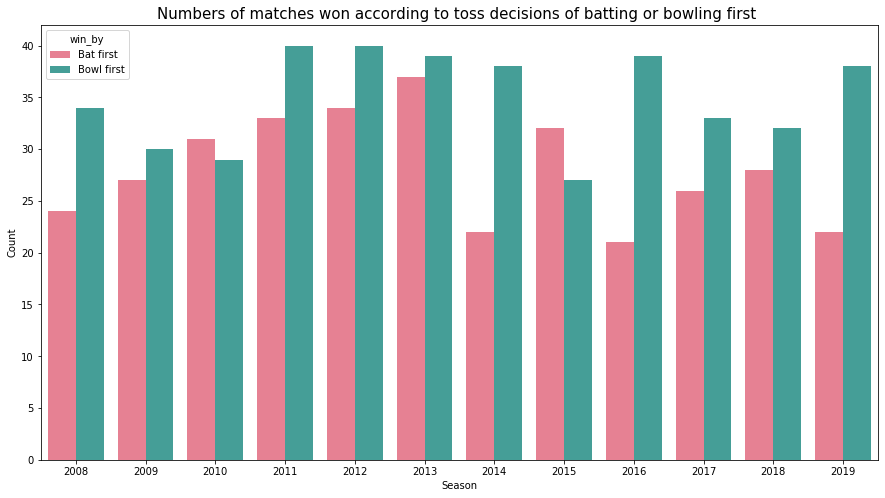

In [18]:
plt.figure(figsize = (15,8))
sn.countplot('season',hue='win_by',data=match,palette="husl")
plt.title("Numbers of matches won according to toss decisions of batting or bowling first ",fontsize=15)
plt.xlabel("Season",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

Almost each year,most no. of wins cames from taking bowling first. 

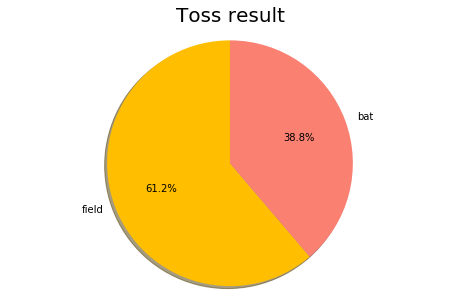

In [19]:
# we will plot pie chart on Toss decision
Toss=match.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (8,5))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

After winning the toss, teams mostly choose fielding rather than batting.

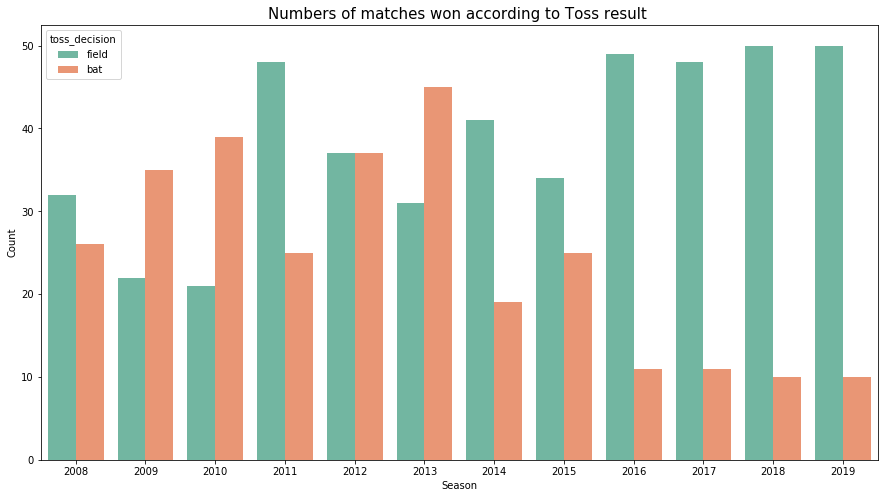

In [20]:
# we will plot graph on Numbers of matches won by Toss result
plt.figure(figsize = (15,8))
sn.countplot('season',hue='toss_decision',data=match,palette='Set2')
plt.title("Numbers of matches won according to Toss result ",fontsize=15)
plt.xlabel("Season",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

In [21]:
# to know winner of each season 
final_matches=match.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


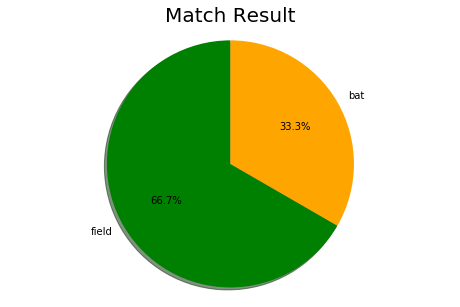

In [22]:
# we will plot pie chart on Winning percentage in final
match = final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
colors = ['green', 'orange']
plt.figure(figsize = (8,5))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

In finals teams which decide to do fielding first win the matches more then the team which bat first.

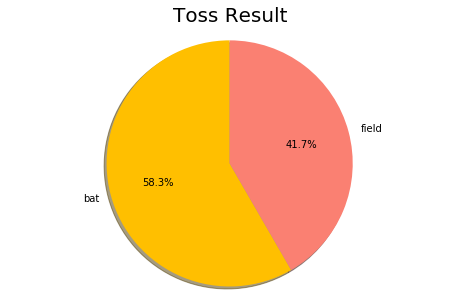

In [23]:
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (8,5))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

In finals most teams after winning toss decide to do fielding first.

<Figure size 1080x576 with 0 Axes>

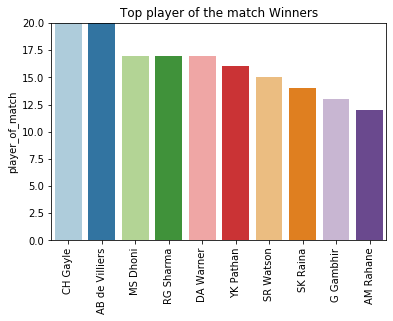

In [26]:
# we will print name of top player in IPL
plt.figure(figsize = (15,8))
top_players = match.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sn.barplot(x = top_players.index, y = top_players, orient='v', palette="Paired")
plt.show()

Top players of match winners are CH gayle and AB de Villiers.

In [27]:
# We will print IPL Finals venues and winners along with the number of wins.
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [28]:
#we will print number of season won by teams
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Deccan Chargers          1
Rajasthan Royals         1
Name: winner, dtype: int64

Most successful team is Mumbai Indian as they have won 4 out of 12 seasons.

In [29]:
# we will print toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


Interestingly out of 12 IPL finals,9 times the team that won the toss was also the winner of that season.

In [30]:
# we will print man of the match of each season
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [31]:
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

9

In [32]:
# we will print numbers of fours hit by team
four_data=complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


Mumbai Indians has hit most number of fours in IPL.

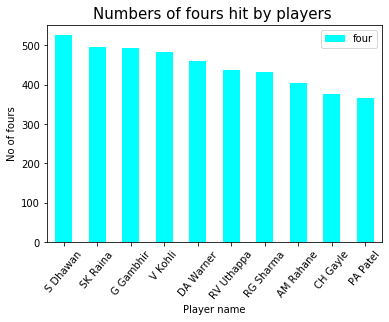

In [33]:
# top 10 most four hitting players.
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='cyan')
plt.title("Numbers of fours hit by players ",fontsize=15)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=10)
plt.ylabel("No of fours",fontsize=10)
plt.show()

S dhawan has hit most number of fours in IPL.

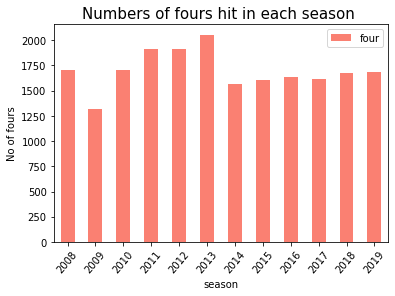

In [34]:
# we will plot graph on no of four hit in each season
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'salmon')
plt.title("Numbers of fours hit in each season ",fontsize=15)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=10)
plt.ylabel("No of fours",fontsize=10)
plt.show()

Year 2013 has witnessed most no. of fours in IPL.

In [35]:
# we will print no of sixes hit by team
six_data=complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


Royal Challengers Bangalore had hitted most no. of sixes in IPL.

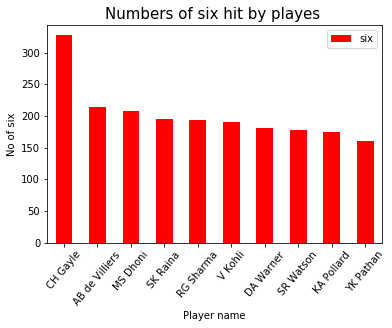

In [36]:
# Top 10 players who had hit most sixes
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='red')
plt.title("Numbers of six hit by playes ",fontsize=15)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=10)
plt.ylabel("No of six",fontsize=10)
plt.show()

CH Gayle had hit most number of sixes in IPL.

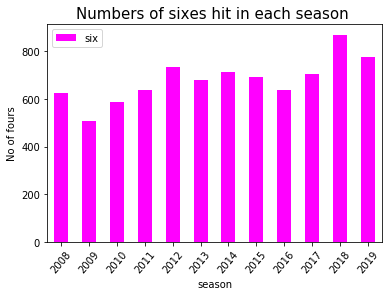

In [37]:
# we will plot graph on no of six hit in each season
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'magenta')
plt.title("Numbers of sixes hit in each season ",fontsize=15)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=10)
plt.ylabel("No of fours",fontsize=10)
plt.show()

Year 2018 saw most number of sixes in the IPL.

In [38]:
#top 10 leading run scorer in IPL
batsman_score=deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print(" Top 10 Leading Run Scorer in IPL ")
batsman_score.iloc[:10,:]

 Top 10 Leading Run Scorer in IPL 


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


Virat Kohli is the leading run scorer of IPL followed by SK Raina and RG Sharma.

In [39]:
# no of matches played by batsman
No_Matches_player= deliveries[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


Most no. of matches are played by SK Raina followed by RG Sharma RV Uthappa.

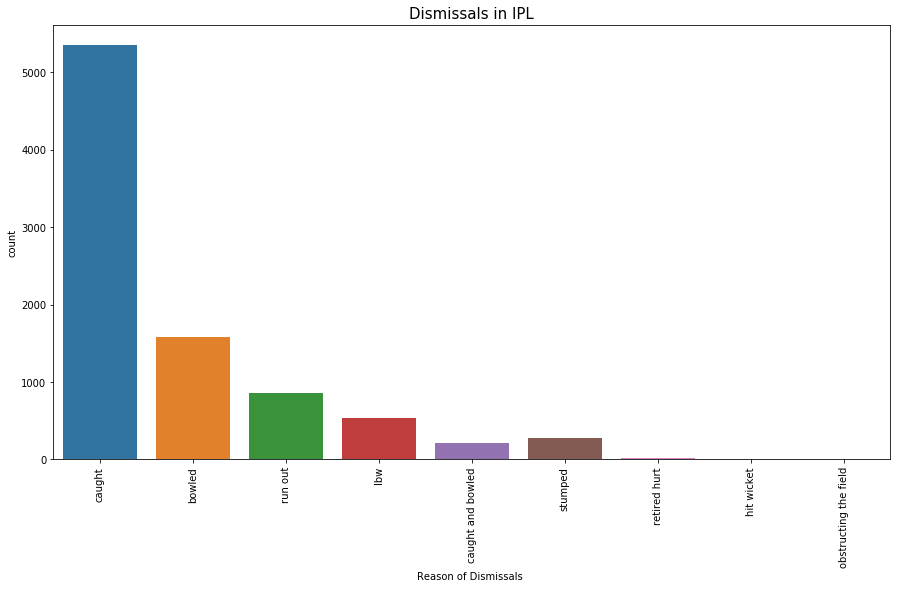

In [42]:
# Dismissals in IPL
plt.figure(figsize=(15,8))
ax=sn.countplot(deliveries.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=15)
plt.xlabel("Reason of Dismissals ",fontsize=10)
plt.ylabel("count",fontsize=10)
plt.xticks(rotation=90)
plt.show()

The most common reason of dismissal in IPL is Catch Out.

In [43]:
wicket_data=deliveries.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [44]:
# most wicket taking bowlers
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


The leading wicket taking bowler is SL Malinga.

**FACTORS CONTRIBUTING WIN OR LOSS OF A TEAM.**

There were more matches won by chasing the total than defending.

The number of wins is higher when toss_decision is 'field'.

Toss winners are match winners in most IPL season's final matches.

**SUGGEST TEAMS OR PLAYERS A COMPANY SHOULD ENDORSE FOR ITS PRODUCTS.**

The teams that can be recommended for companies to endorse are: Mumbai Indians, Chennai Super Kings and Kolkata Knight Riders as they are the most successful teams.

The recommended bowler for companies to endorse could be: SL Malinga, Harbajan Singh and A.Mishra.

The recommended batman for companies to endorse could be: CH Gayle, AB de Villiers, V Kohli, S Dhawan and SK Raina.